In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# importing required libraries
import numpy as np
import pandas as pd

import pickle # saving and loading trained model
from os import path

# importing required libraries for normalizing data
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# importing library for plotting
import matplotlib.pyplot as plt

# importing library for support vector machine classifier
from sklearn.svm import SVC
# importing library for K-neares-neighbor classifier
from sklearn.neighbors import KNeighborsClassifier
# importing library for Linear Discriminant Analysis Model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# importing library for Quadratic Discriminant Analysis Model
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn import metrics
from sklearn.metrics import accuracy_score # for calculating accuracy of model
from sklearn.model_selection import train_test_split # for splitting the dataset for training and testing
from sklearn.metrics import classification_report # for generating a classification report of model

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

from keras.layers import Dense # importing dense layer
from keras.models import Sequential #importing Sequential layer
from keras.models import model_from_json # saving and loading trained model

from keras.layers import LSTM
from keras.layers import Input
from keras.models import Model

# representation of model layers
from keras.utils.vis_utils import plot_model

In [ ]:
col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label","difficulty_level"]

In [ ]:
# importing dataset
data = pd.read_csv('/content/drive/MyDrive/cyberData/KDDTrain+.txt',header=None, names=col_names)
data_t = pd.read_table("/content/drive/MyDrive/cyberData/KDDTest+.txt",header=None, names=col_names)

In [ ]:
data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty_level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


In [ ]:
# remove attribute 'difficulty_level'
data.drop(['difficulty_level'],axis=1,inplace=True)
data.shape

(125973, 42)

In [ ]:
# remove attribute 'difficulty_level'
data_t.drop(['difficulty_level'],axis=1,inplace=True)
data_t.shape

(22544, 42)

In [ ]:
# number of attack labels 
data['label'].value_counts()

normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: label, dtype: int64

In [ ]:
# changing attack labels to their respective attack class
def change_label(df):
  df.label.replace(['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm'],'Dos',inplace=True)
  df.label.replace(['ftp_write','guess_passwd','httptunnel','imap','multihop','named','phf','sendmail',
       'snmpgetattack','snmpguess','spy','warezclient','warezmaster','xlock','xsnoop'],'R2L',inplace=True)
  df.label.replace(['ipsweep','mscan','nmap','portsweep','saint','satan'],'Probe',inplace=True)
  df.label.replace(['buffer_overflow','loadmodule','perl','ps','rootkit','sqlattack','xterm'],'U2R',inplace=True)

In [ ]:
# calling change_label() function
change_label(data)

In [ ]:
change_label(data_t)

In [ ]:
# distribution of attack classes
data.label.value_counts()

normal    67343
Dos       45927
Probe     11656
R2L         995
U2R          52
Name: label, dtype: int64

In [ ]:
# selecting numeric attributes columns from data
numeric_col = data.select_dtypes(include='number').columns

In [ ]:
# using standard scaler for normalizing
std_scaler = StandardScaler()
def normalization(df,col):
  for i in col:
    arr = df[i]
    arr = np.array(arr)
    df[i] = std_scaler.fit_transform(arr.reshape(len(arr),1))
  return df

In [ ]:
# data before normalization
data.head()

# calling the normalization() function
data = normalization(data.copy(),numeric_col)

# data after normalization
data.head()

# selecting categorical data attributes
cat_col = ['protocol_type','service','flag']

# creating a dataframe with only categorical attributes
categorical = data[cat_col]
categorical.head()

# one-h
categorical = pd.get_dummies(categorical,columns=cat_col)
categorical.head()

# changing attack labels into two categories 'normal' and 'abnormal'
bin_label = pd.DataFrame(data.label.map(lambda x:'normal' if x=='normal' else 'abnormal'))

# creating a dataframe with binary labels (normal,abnormal)
bin_data = data.copy()
bin_data['label'] = bin_label

# label encoding (0,1) binary labels (abnormal,normal)
le1 = preprocessing.LabelEncoder()
enc_label = bin_label.apply(le1.fit_transform)
bin_data['intrusion'] = enc_label

# dataset with binary labels and label encoded column
bin_data.head()

# one-hot-encoding attack label
bin_data = pd.get_dummies(bin_data,columns=['label'],prefix="",prefix_sep="") 
bin_data['label'] = bin_label
bin_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,intrusion,abnormal,normal,label
0,-0.110249,tcp,ftp_data,SF,-0.007679,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,0.069972,-0.289103,-0.639532,-0.624871,-0.224532,-0.376387,1,0,1,normal
1,-0.110249,udp,other,SF,-0.007737,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,2.367737,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,1,0,1,normal
2,-0.110249,tcp,private,S0,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,0,1,0,abnormal
3,-0.110249,tcp,http,SF,-0.007723,-0.002891,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.383108,0.066252,-0.572083,-0.602433,-0.387635,-0.345084,1,0,1,normal
4,-0.110249,tcp,http,SF,-0.007728,-0.004814,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.480197,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,1,0,1,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,-0.110249,tcp,private,S0,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,0,1,0,abnormal
125969,-0.107178,udp,private,SF,-0.007744,-0.004883,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.447834,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,1,0,1,normal
125970,-0.110249,tcp,smtp,SF,-0.007382,-0.004823,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.480197,-0.289103,0.979238,-0.624871,-0.355014,-0.376387,1,0,1,normal
125971,-0.110249,tcp,klogin,S0,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,0,1,0,abnormal


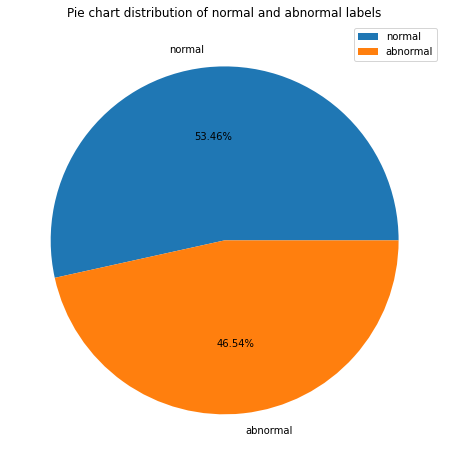

In [ ]:
# pie chart distribution of normal and abnormal labels
plt.figure(figsize=(8,8))
plt.pie(bin_data.label.value_counts(),labels=bin_data.label.unique(),autopct='%0.2f%%')
plt.title("Pie chart distribution of normal and abnormal labels")
plt.legend()
# plt.savefig('plots/Pie_chart_binary.png')
plt.show()

In [ ]:
# creating a dataframe with only numeric attributes of binary class dataset and encoded label attribute 
numeric_bin = bin_data[numeric_col]
numeric_bin['intrusion'] = bin_data['intrusion']

# finding the attributes which have more than 0.5 correlation with encoded attack label attribute 
corr= numeric_bin.corr()
corr_y = abs(corr['intrusion'])
highest_corr = corr_y[corr_y >0.5]
highest_corr.sort_values(ascending=True)

# selecting attributes found by using pearson correlation coefficient
numeric_bin = bin_data[['count','srv_serror_rate','serror_rate','dst_host_serror_rate','dst_host_srv_serror_rate',
                         'logged_in','dst_host_same_srv_rate','dst_host_srv_count','same_srv_rate']]

# joining the selected attribute with the one-hot-encoded categorical dataframe
numeric_bin = numeric_bin.join(categorical)
# then joining encoded, one-hot-encoded, and original attack label attribute
bin_data = numeric_bin.join(bin_data[['intrusion','abnormal','normal','label']])

bin_data


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,count,srv_serror_rate,serror_rate,dst_host_serror_rate,dst_host_srv_serror_rate,logged_in,dst_host_same_srv_rate,dst_host_srv_count,same_srv_rate,protocol_type_icmp,...,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,intrusion,abnormal,normal,label
0,-0.717045,-0.631929,-0.637209,-0.639532,-0.624871,-0.809262,-0.782367,-0.818890,0.771283,0,...,0,0,0,0,1,0,1,0,1,normal
1,-0.620982,-0.631929,-0.637209,-0.639532,-0.624871,-0.809262,-1.161030,-1.035688,-1.321428,0,...,0,0,0,0,1,0,1,0,1,normal
2,0.339648,1.605104,1.602664,1.608759,1.618955,-0.809262,-0.938287,-0.809857,-1.389669,0,...,1,0,0,0,0,0,0,1,0,abnormal
3,-0.690846,-0.184522,-0.189235,-0.572083,-0.602433,1.235694,1.066401,1.258754,0.771283,0,...,0,0,0,0,1,0,1,0,1,normal
4,-0.472521,-0.631929,-0.637209,-0.639532,-0.624871,1.235694,1.066401,1.258754,0.771283,0,...,0,0,0,0,1,0,1,0,1,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0.872361,1.605104,1.602664,1.608759,1.618955,-0.809262,-0.938287,-0.818890,-1.184947,0,...,1,0,0,0,0,0,0,1,0,abnormal
125969,-0.717045,-0.631929,-0.637209,-0.639532,-0.624871,-0.809262,0.977304,1.159389,0.771283,0,...,0,0,0,0,1,0,1,0,1,normal
125970,-0.725778,-0.631929,-0.637209,0.979238,-0.624871,1.235694,-0.893738,-0.773724,0.771283,0,...,0,0,0,0,1,0,1,0,1,normal
125971,0.523041,1.605104,1.602664,1.608759,1.618955,-0.809262,-1.094207,-0.972455,-1.366922,0,...,1,0,0,0,0,0,0,1,0,abnormal


In [ ]:
X = bin_data.iloc[:,0:93].to_numpy() # dataset excluding target attribute (encoded, one-hot-encoded,original)
Y = bin_data['intrusion'] # target attribute

# splitting the dataset 75% for training and 25% testing
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=42)

SVM

In [ ]:
# using kernel as linear 
lsvm = SVC(kernel='linear',gamma='auto') 
lsvm.fit(X_train,y_train) # training model on training dataset

SVC(gamma='auto', kernel='linear')

In [ ]:
y_pred = lsvm.predict(X_test) # predicting target attribute on testing dataset
ac = accuracy_score(y_test, y_pred)*100 # calculating accuracy of predicted data
print("LSVM-Classifier Binary Set-Accuracy is ", ac)

# classification report
print(classification_report(y_test, y_pred,target_names=le1.classes_))

print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

LSVM-Classifier Binary Set-Accuracy is  96.69778370483266
              precision    recall  f1-score   support

    abnormal       0.97      0.96      0.96     14720
      normal       0.96      0.97      0.97     16774

    accuracy                           0.97     31494
   macro avg       0.97      0.97      0.97     31494
weighted avg       0.97      0.97      0.97     31494

Mean Absolute Error -  0.03302216295167333
Mean Squared Error -  0.03302216295167333
Root Mean Squared Error -  0.1817200125238641
R2 Score -  86.74560396265441
Accuracy -  96.69778370483266


QSVM

In [ ]:
qsvm=SVC(kernel='poly',gamma='auto') # using kernal as polynomial for quadratic svm
qsvm.fit(X_train,y_train) # training model on training dataset
y_pred=qsvm.predict(X_test) # predicting target attribute on testing dataset
ac=accuracy_score(y_test, y_pred)*100 # calculating accuracy of predicted data
print("QSVM-Classifier Binary Set-Accuracy is ", ac)

# classification report
print(classification_report(y_test, y_pred,target_names=le1.classes_))

print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

QSVM-Classifier Binary Set-Accuracy is  95.71029402425859
              precision    recall  f1-score   support

    abnormal       0.99      0.92      0.95     14720
      normal       0.93      0.99      0.96     16774

    accuracy                           0.96     31494
   macro avg       0.96      0.95      0.96     31494
weighted avg       0.96      0.96      0.96     31494

Mean Absolute Error -  0.04289705975741411
Mean Squared Error -  0.04289705975741411
Root Mean Squared Error -  0.20711605383797296
R2 Score -  83.24290009836652
Accuracy -  95.71029402425859


LDA

In [ ]:
lda = LinearDiscriminantAnalysis() 
lda.fit(X_train, y_train)  # training model on training dataset

y_pred = lda.predict(X_test) # predicting target attribute on testing dataset
ac=accuracy_score(y_test, y_pred)*100 # calculating accuracy of predicted data
print("LDA-Classifier Set-Accuracy is ", ac)

# classification report
print(classification_report(y_test, y_pred,target_names=le1.classes_))

print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

LDA-Classifier Set-Accuracy is  96.70730932876104
              precision    recall  f1-score   support

    abnormal       0.97      0.96      0.96     14720
      normal       0.96      0.98      0.97     16774

    accuracy                           0.97     31494
   macro avg       0.97      0.97      0.97     31494
weighted avg       0.97      0.97      0.97     31494

Mean Absolute Error -  0.03292690671238966
Mean Squared Error -  0.03292690671238966
Root Mean Squared Error -  0.1814577270671868
R2 Score -  86.8001441639753
Accuracy -  96.70730932876104


QDA

In [ ]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train) # training model on training dataset

y_pred = qda.predict(X_test) # predicting target attribute on testing dataset
ac=accuracy_score(y_test, y_pred)*100  # calculating accuracy of predicted data
print("QDA-Classifier Set-Accuracy is ", ac)

# classification report
print(classification_report(y_test, y_pred,target_names=le1.classes_))

print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QDA-Classifier Set-Accuracy is  68.84168413031053
              precision    recall  f1-score   support

    abnormal       1.00      0.33      0.50     14720
      normal       0.63      1.00      0.77     16774

    accuracy                           0.69     31494
   macro avg       0.81      0.67      0.64     31494
weighted avg       0.80      0.69      0.65     31494

Mean Absolute Error -  0.3115831586968946
Mean Squared Error -  0.3115831586968946
Root Mean Squared Error -  0.5581963442167054
R2 Score -  13.69091326315054
Accuracy -  68.84168413031053


Perceptron

In [ ]:
# X = bin_data.iloc[:,0:93].values # dataset excluding target attribute (encoded, one-hot-encoded,original)
# Y = bin_data[['intrusion']].values # target attribute

# splitting the dataset 75% for training and 25% testing
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=42)

mlp = Sequential() # creating model

# adding input layer and first layer with 50 neurons
mlp.add(Dense(units=50, input_dim=X_train.shape[1], activation='relu'))
# output layer with sigmoid activation
mlp.add(Dense(units=1,activation='sigmoid'))

# defining loss function, optimizer, metrics and then compiling model
mlp.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# summary of model layers
mlp.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 50)                4700      
                                                                 
 dense_9 (Dense)             (None, 1)                 51        
                                                                 
Total params: 4,751
Trainable params: 4,751
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# training the model on training dataset
history = mlp.fit(X_train, y_train, epochs=100, batch_size=5000,validation_split=0.2)

Epoch 1/100
16/16 [==============================] - 1s 15ms/step - loss: 0.5767 - accuracy: 0.7382 - val_loss: 0.4353 - val_accuracy: 0.8851
Epoch 2/100
16/16 [==============================] - 0s 8ms/step - loss: 0.3638 - accuracy: 0.9057 - val_loss: 0.2957 - val_accuracy: 0.9204
Epoch 3/100
16/16 [==============================] - 0s 7ms/step - loss: 0.2634 - accuracy: 0.9190 - val_loss: 0.2324 - val_accuracy: 0.9233
Epoch 4/100
16/16 [==============================] - 0s 7ms/step - loss: 0.2158 - accuracy: 0.9220 - val_loss: 0.1994 - val_accuracy: 0.9346
Epoch 5/100
16/16 [==============================] - 0s 8ms/step - loss: 0.1885 - accuracy: 0.9432 - val_loss: 0.1783 - val_accuracy: 0.9544
Epoch 6/100
16/16 [==============================] - 0s 7ms/step - loss: 0.1698 - accuracy: 0.9580 - val_loss: 0.1630 - val_accuracy: 0.9636
Epoch 7/100
16/16 [==============================] - 0s 8ms/step - loss: 0.1558 - accuracy: 0.9643 - val_loss: 0.1512 - val_accuracy: 0.9664
Epoch 8/100


In [ ]:
# defining loss function, optimizer, metrics and then compiling model
mlp.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# predicting target attribute on testing dataset
test_results = mlp.evaluate(X_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}')

y_pred = mlp.predict(X_test).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = auc(fpr, tpr)

pred = mlp.predict(X_test)
y_classes = (mlp.predict(X_test)>0.5).astype('int32')

print("Recall Score - ",recall_score(y_test,y_classes))
print("F1 Score - ",f1_score(y_test,y_classes))
print("Precision Score - ",precision_score(y_test,y_classes))

985/985 [==============================] - 1s 931us/step - loss: 0.0647 - accuracy: 0.9780
Test results - Loss: 0.06468357145786285 - Accuracy: 97.79958128929138
Recall Score -  0.9867056158340288
F1 Score -  0.9794940079893475
Precision Score -  0.9723870512895835


Ada-grad

In [ ]:
X1 = bin_data.iloc[:,0:93].values # dataset excluding target attribute (encoded, one-hot-encoded,original)
Y1 = bin_data[['intrusion']].values # target attribute

# X = bin_data.iloc[:,0:93].to_numpy() # dataset excluding target attribute (encoded, one-hot-encoded,original)
# Y = bin_data['intrusion'] # target attribute

# splitting the dataset 75% for training and 25% testing
X_train, X_test, y_train, y_test = train_test_split(X1,Y1, test_size=0.25, random_state=42)

mlp1 = Sequential() # creating model

# adding input layer and first layer with 50 neurons
mlp1.add(Dense(units=50, input_dim=X_train.shape[1], activation='relu'))
# output layer with sigmoid activation
mlp1.add(Dense(units=1,activation='sigmoid'))

# defining loss function, optimizer, metrics and then compiling model
mlp1.compile(loss='binary_crossentropy', optimizer='adagrad', metrics=['accuracy'])

# summary of model layers
mlp1.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 50)                4700      
                                                                 
 dense_27 (Dense)            (None, 1)                 51        
                                                                 
Total params: 4,751
Trainable params: 4,751
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# training the model on training dataset
history = mlp1.fit(X_train, y_train, epochs=100, batch_size=5000,validation_split=0.2)

Epoch 1/100
16/16 [==============================] - 1s 15ms/step - loss: 0.7423 - accuracy: 0.5336 - val_loss: 0.7125 - val_accuracy: 0.5362
Epoch 2/100
16/16 [==============================] - 0s 7ms/step - loss: 0.6955 - accuracy: 0.5382 - val_loss: 0.6735 - val_accuracy: 0.5533
Epoch 3/100
16/16 [==============================] - 0s 8ms/step - loss: 0.6605 - accuracy: 0.5863 - val_loss: 0.6427 - val_accuracy: 0.6347
Epoch 4/100
16/16 [==============================] - 0s 8ms/step - loss: 0.6324 - accuracy: 0.6573 - val_loss: 0.6173 - val_accuracy: 0.6866
Epoch 5/100
16/16 [==============================] - 0s 8ms/step - loss: 0.6087 - accuracy: 0.7061 - val_loss: 0.5954 - val_accuracy: 0.7358
Epoch 6/100
16/16 [==============================] - 0s 9ms/step - loss: 0.5881 - accuracy: 0.7500 - val_loss: 0.5762 - val_accuracy: 0.7701
Epoch 7/100
16/16 [==============================] - 0s 9ms/step - loss: 0.5700 - accuracy: 0.7770 - val_loss: 0.5593 - val_accuracy: 0.7947
Epoch 8/100


In [ ]:
# defining loss function, optimizer, metrics and then compiling model
mlp1.compile(loss='binary_crossentropy', optimizer='adagrad', metrics=['accuracy'])

# predicting target attribute on testing dataset
test_results = mlp1.evaluate(X_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}')

y_pred = mlp1.predict(X_test).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# auc = auc(fpr, tpr)

pred = mlp1.predict(X_test)
y_classes = (mlp.predict(X_test)>0.5).astype('int32')

print("Recall Score - ",recall_score(y_test,y_classes))
print("F1 Score - ",f1_score(y_test,y_classes))
print("Precision Score - ",precision_score(y_test,y_classes))

985/985 [==============================] - 2s 2ms/step - loss: 0.2712 - accuracy: 0.9045
Test results - Loss: 0.2711753249168396 - Accuracy: 90.44897556304932
Recall Score -  0.9873017765589603
F1 Score -  0.9817125581671065
Precision Score -  0.9761862658414383


RMSPROP

In [ ]:
X1 = bin_data.iloc[:,0:93].values # dataset excluding target attribute (encoded, one-hot-encoded,original)
Y1 = bin_data[['intrusion']].values # target attribute

# X = bin_data.iloc[:,0:93].to_numpy() # dataset excluding target attribute (encoded, one-hot-encoded,original)
# Y = bin_data['intrusion'] # target attribute

# splitting the dataset 75% for training and 25% testing
X_train, X_test, y_train, y_test = train_test_split(X1,Y1, test_size=0.25, random_state=42)

mlp1 = Sequential() # creating model

# adding input layer and first layer with 50 neurons
mlp1.add(Dense(units=50, input_dim=X_train.shape[1], activation='relu'))
# output layer with sigmoid activation
mlp1.add(Dense(units=1,activation='sigmoid'))

# defining loss function, optimizer, metrics and then compiling model
mlp1.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# summary of model layers
mlp1.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 50)                4700      
                                                                 
 dense_29 (Dense)            (None, 1)                 51        
                                                                 
Total params: 4,751
Trainable params: 4,751
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# training the model on training dataset
history = mlp1.fit(X_train, y_train, epochs=100, batch_size=5000,validation_split=0.2)

Epoch 1/100
16/16 [==============================] - 1s 15ms/step - loss: 0.4837 - accuracy: 0.8578 - val_loss: 0.3576 - val_accuracy: 0.9094
Epoch 2/100
16/16 [==============================] - 0s 8ms/step - loss: 0.3074 - accuracy: 0.9143 - val_loss: 0.2613 - val_accuracy: 0.9201
Epoch 3/100
16/16 [==============================] - 0s 8ms/step - loss: 0.2353 - accuracy: 0.9206 - val_loss: 0.2112 - val_accuracy: 0.9237
Epoch 4/100
16/16 [==============================] - 0s 8ms/step - loss: 0.1949 - accuracy: 0.9254 - val_loss: 0.1801 - val_accuracy: 0.9379
Epoch 5/100
16/16 [==============================] - 0s 8ms/step - loss: 0.1680 - accuracy: 0.9505 - val_loss: 0.1583 - val_accuracy: 0.9576
Epoch 6/100
16/16 [==============================] - 0s 8ms/step - loss: 0.1482 - accuracy: 0.9597 - val_loss: 0.1415 - val_accuracy: 0.9620
Epoch 7/100
16/16 [==============================] - 0s 7ms/step - loss: 0.1328 - accuracy: 0.9632 - val_loss: 0.1280 - val_accuracy: 0.9634
Epoch 8/100


In [ ]:
# defining loss function, optimizer, metrics and then compiling model
mlp1.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# predicting target attribute on testing dataset
test_results = mlp1.evaluate(X_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}')

y_pred = mlp1.predict(X_test).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# auc = auc(fpr, tpr)

pred = mlp1.predict(X_test)
y_classes = (mlp.predict(X_test)>0.5).astype('int32')

print("Recall Score - ",recall_score(y_test,y_classes))
print("F1 Score - ",f1_score(y_test,y_classes))
print("Precision Score - ",precision_score(y_test,y_classes))

985/985 [==============================] - 1s 1ms/step - loss: 0.0594 - accuracy: 0.9799
Test results - Loss: 0.059357259422540665 - Accuracy: 97.99009561538696
Recall Score -  0.9873017765589603
F1 Score -  0.9817125581671065
Precision Score -  0.9761862658414383


[1.2488088e-02 4.7561823e-04 2.0278534e-03 6.1635249e-03 3.6414491e-03
 6.8162056e-03 2.4774628e-02 3.3723697e-02 1.3769719e-01 7.8788646e-02
 2.3329605e-03 1.8829515e-03 4.2538485e-03 1.9715035e-03 0.0000000e+00
 0.0000000e+00 9.6663868e-04 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 7.4208863e-03
 0.0000000e+00 5.3251470e-03 6.4531197e-03 0.0000000e+00 0.0000000e+00
 0.0000000e+00 6.5191691e-03 8.6629782e-03 9.1445149e-04 0.0000000e+00
 0.0000000e+00 1.0640386e-03 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 1.4602155e-03 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 4.7824319e-02 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 7.7188080e-03 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.000

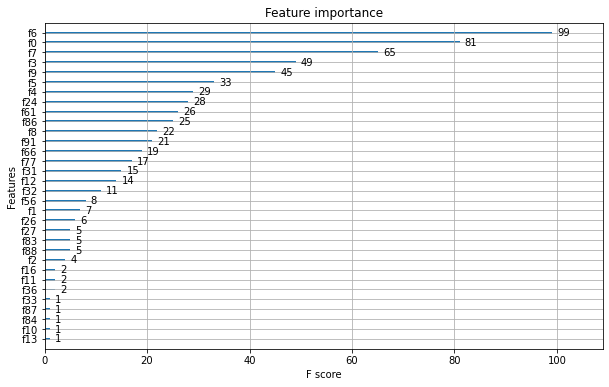

In [ ]:
# plot feature importance manually
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot
# # load data
# dataset = loadtxt('pima-indians-diabetes.csv', delimiter=",")
# # split data into X and y
# X = dataset[:,0:8]
# y = dataset[:,8]
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)
# feature importance
print(model.feature_importances_)

pyplot.rcParams["figure.figsize"] = (10,6)
plot_importance(model)
pyplot.show()

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
selection = SelectFromModel(model, prefit=True)
select_X_train = selection.transform(X_train)

In [ ]:
len(select_X_train[0])

7